In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os
import tqdm
import glob
import tensorflow

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from skimage.io import imread, imshow
from skimage.transform import resize
#from skimage.color import rgb2grey # The rgb2grey function was likely renamed in a later version of scikit-image
from skimage.color import rgb2gray # Use rgb2gray instead of rgb2grey
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.preprocessing.image import load_img, img_to_array



In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=30,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split = 0.2)

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255)

In [5]:
train_dataset  = train_datagen.flow_from_directory(directory = r'D:\CODING\Alzheimer_s Dataset\train',
                                                   target_size = (224,224),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 128)

Found 4098 images belonging to 4 classes.


In [9]:
valid_dataset = valid_datagen.flow_from_directory(directory = r'D:\CODING\Alzheimer_s Dataset\train',
                                                  target_size = (224,224),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 128)

Found 1023 images belonging to 4 classes.


100%|██████████| 5/5 [00:12<00:00,  2.47s/it]


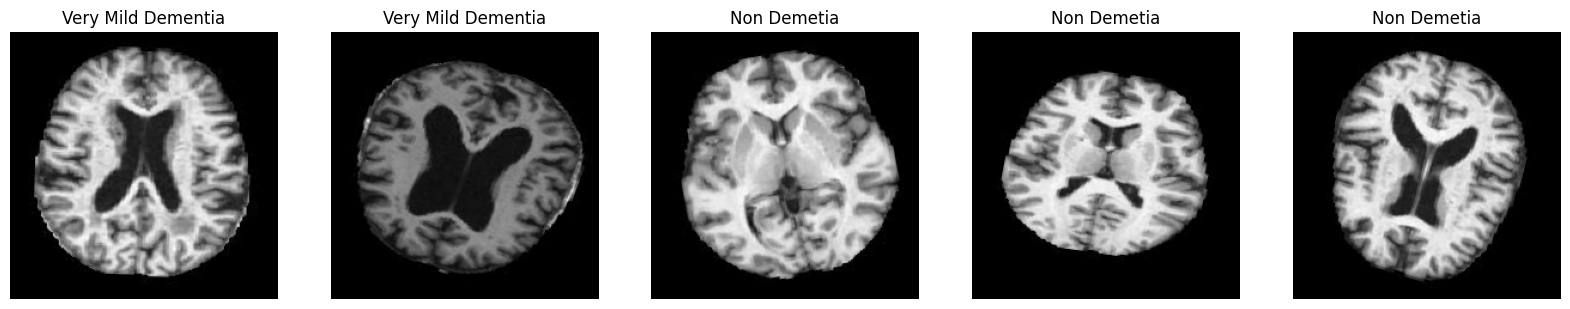

In [11]:
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize=(20,20))

for i in tqdm(range(0,5)):
    rand1 = np.random.randint(len(train_dataset))
    rand2 = np.random.randint(100)
    ax[i].imshow(train_dataset[rand1][0][rand2])
    ax[i].axis('off')
    a = train_dataset[rand1][1][rand2]
    if a[0] == 1:
        ax[i].set_title('Mild Dementia')
    elif a[1] == 1:
        ax[i].set_title('Moderate Dementia')
    elif a[2] == 1:
        ax[i].set_title('Non Demetia')
    elif a[3] == 1:
        ax[i].set_title('Very Mild Dementia')

In [13]:
valid_dataset = valid_datagen.flow_from_directory(directory = r'D:\CODING\Alzheimer_s Dataset\train', # Changed directory to match the train_dataset path
                                                  target_size = (224,224),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 128)

Found 1023 images belonging to 4 classes.


In [15]:
import tensorflow as tf # Make sure to import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=30,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split = 0.2)

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255)

In [17]:
import tensorflow as tf # Make sure to import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=30,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split = 0.2)

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255)


In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Sequential, Model
# Input shape for the model
input_shape = (224, 224, 3)

# Load the DenseNet169 model without the top classification layers
base_model = DenseNet169(input_shape=input_shape, include_top=False, weights="imagenet")

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model by adding layers on top of the base model
# Use the Functional API instead of Sequential to define input shape explicitly
inputs = tf.keras.Input(shape=input_shape)
x = base_model(inputs, training=False)  # Set training=False to freeze base_model during training
x = Dropout(0.5)(x)
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(2048, kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(1024, kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(4, activation='softmax')(x)

# Create the final model
model = Model(inputs=inputs, outputs=outputs)


model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet169 (Functional)        │ (None, 7, 7, 1664)     │    12,642,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 1664)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 81536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 81536)          │       326,144 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2048)           │   166,987,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         4,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 182,071,364 (694.55 MB)

 Trainable params: 169,259,268 (645.67 MB)

 Non-trainable params: 12,812,096 (48.87 MB)

In [21]:
OPT = tensorflow.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',
              metrics=[tensorflow.keras.metrics.AUC(name = 'auc')],
              optimizer=OPT)


In [23]:
filepath = './best_weights.keras' # Change the file extension to .keras

earlystopping = EarlyStopping(monitor = 'val_auc',
                              mode = 'max' ,
                              patience = 15,
                              verbose = 1)

checkpoint    = ModelCheckpoint(filepath, # Pass the updated filepath
                                monitor = 'val_auc',
                                mode='max',
                                save_best_only=True,
                                verbose = 1)


callback_list = [earlystopping, checkpoint]

In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# ... (Previous code remains the same) ...
# Modify the model architecture
# Use GlobalAveragePooling2D instead of Flatten
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)  # Replace Flatten() with GlobalAveragePooling2D()
x = Dropout(0.5)(x)
# ... (Rest of the model architecture remains the same) ...

# ... (Compile and fit as before) ...

model_history = model.fit(train_dataset,
                        validation_data=valid_dataset,
                        epochs=5,
                        callbacks=callback_list,
                        verbose=1)

Epoch 1/5


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - auc: 0.7273 - loss: 1.5550
Epoch 1: val_auc improved from -inf to 0.71520, saving model to ./best_weights.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 254s 7s/step - auc: 0.7290 - loss: 1.5490 - val_auc: 0.7152 - val_loss: 3.8096
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - auc: 0.8281 - loss: 1.1582
Epoch 2: val_auc improved from 0.71520 to 0.78048, saving model to ./best_weights.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 218s 6s/step - auc: 0.8282 - loss: 1.1569 - val_auc: 0.7805 - val_loss: 1.7887
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - auc: 0.8484 - loss: 0.9927
Epoch 3: val_auc improved from 0.78048 to 0.80627, saving model to ./best_weights.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 219s 6s/step - auc: 0.8484 - loss: 0.9922 - val_auc: 0.8063 - val_loss: 1.2711
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - auc: 0.8689 - loss: 0.9046
Epoch 4: val_auc did not improve from 0.80627
33/33 ━━━━━━━━━━━━━━━━━━━━ 216s 6s/step - auc: 0.8687 - loss: 0.9052 - val_au

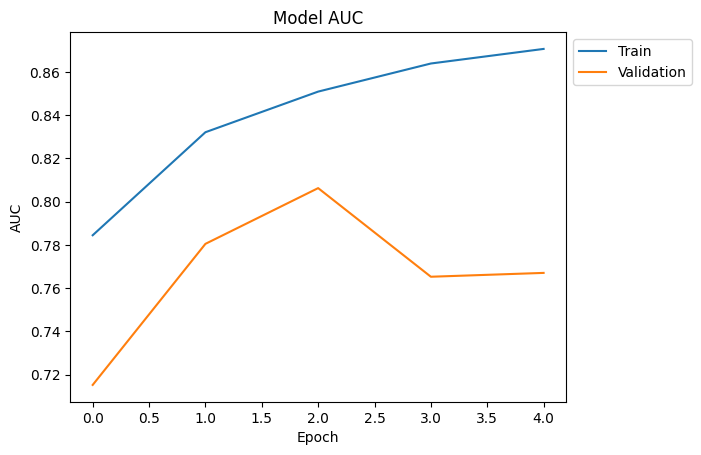

In [27]:
plt.plot(model_history.history['auc'])
plt.plot(model_history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

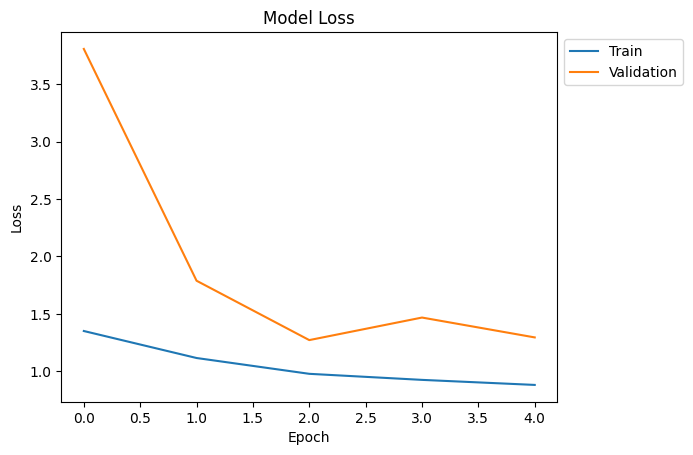

In [29]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [33]:
test_dataset  = test_datagen.flow_from_directory(directory = r'D:\CODING\Alzheimer_s Dataset\test',
                                                 target_size = (224,224),
                                                 class_mode = 'categorical',
                                                 batch_size = 128)

Found 1279 images belonging to 4 classes.


In [35]:
model.evaluate(test_dataset)

10/10 ━━━━━━━━━━━━━━━━━━━━ 47s 5s/step - auc: 0.8169 - loss: 1.0676


[1.0388814210891724, 0.8238978385925293]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
58.67 % chances are there that the image is NonDemented


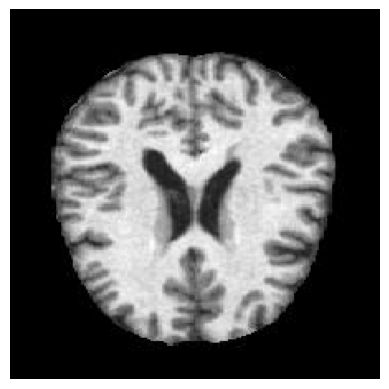

In [75]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from matplotlib.pyplot import imshow

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img(r"D:\CODING\Alzheimer_s Dataset\test\NonDemented\26 (84).jpg", target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)

# Replace predict_classes with predict and argmax for class prediction
predictions = model.predict(img) # Get the model's predictions
answer = np.argmax(predictions)  # Get the index of the class with the highest probability

probability = round(np.max(predictions)*100,2)

print(probability, '% chances are there that the image is',idc[answer])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
68.08 % chances are there that the image is VeryMildDemented


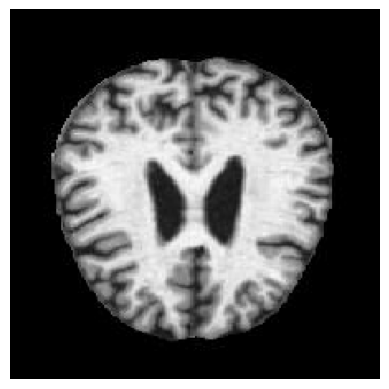

In [83]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from matplotlib.pyplot import imshow

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img(r"D:\CODING\Alzheimer_s Dataset\test\VeryMildDemented\32.jpg", target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)

# Replace predict_classes with predict and argmax for class prediction
predictions = model.predict(img) # Get the model's predictions
answer = np.argmax(predictions)  # Get the index of the class with the highest probability

probability = round(np.max(predictions)*100,2)

print(probability, '% chances are there that the image is',idc[answer])

In [41]:
def plot_confusion_matrix(true_lab,predict_lab,classes,path):
  matrix_confusion = tf.math.confusion_matrix(labels=true_lab, predictions=predicted_lab, num_classes=len(classes))
  ax = plt.subplot()
  sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(classes)
  ax.yaxis.set_ticklabels(classes)
  plt.savefig(f'{path}confusion_matrix.png')

In [43]:
def dump_text(text,path):
  text_file = open(path, "w")
  text_file.write(text)
  text_file.close()

In [55]:
test_generator = test_datagen.flow_from_directory(
    r'D:\CODING\Alzheimer_s Dataset\test',  # Replace with the actual path
    target_size=(224, 224),  # Change this to 224x224 to match DenseNet121's input size
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 1279 images belonging to 4 classes.


40/40 ━━━━━━━━━━━━━━━━━━━━ 36s 893ms/step


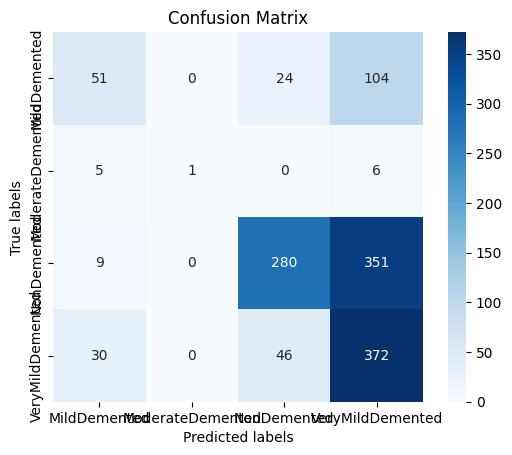

Precision per class: {'MildDemented': 0.5368421052631579, 'ModerateDemented': 1.0, 'NonDemented': 0.8, 'VeryMildDemented': 0.44657863145258103}

Classification Report:
                   precision    recall  f1-score   support

    MildDemented       0.54      0.28      0.37       179
ModerateDemented       1.00      0.08      0.15        12
     NonDemented       0.80      0.44      0.57       640
VeryMildDemented       0.45      0.83      0.58       448

        accuracy                           0.55      1279
       macro avg       0.70      0.41      0.42      1279
    weighted avg       0.64      0.55      0.54      1279



In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, precision_score

# Function to plot confusion matrix and precision
def plot_confusion_matrix(true_lab, predicted_lab, classes, path):
    matrix_confusion = tf.math.confusion_matrix(labels=true_lab, predictions=predicted_lab, num_classes=len(classes))
    
    # Plotting the confusion matrix using seaborn heatmap
    ax = plt.subplot()
    sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)
    
    # Labels, titles, and other visual details
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    
    # Save plot to file if needed
    plt.savefig(path)
    plt.show()
    
    # Calculate precision for each class
    precision = precision_score(true_lab, predicted_lab, average=None)
    print("Precision per class:", dict(zip(classes, precision)))
    
    # Display classification report for detailed metrics
    print("\nClassification Report:\n", classification_report(true_lab, predicted_lab, target_names=classes))

# Confusion Matrix for DenseNet121
p = model.predict(test_generator)
predicted_lab = p.argmax(axis=-1)
true_lab = test_generator.classes

# Use the function and provide the file path
plot_confusion_matrix(true_lab, predicted_lab, list(test_generator.class_indices.keys()), 'confusion_matrix.png')
